In [5]:
import numpy
import math
import matplotlib.pyplot as plt

In [67]:
A = 100
N = 100
B = 0.95
K = 1000 #Количество выборок с возвращением

arr = numpy.random.rand(N) * A
#arr

99.78174058563948

In [60]:
print("B = {}".format(B))
print("Точный доверительный интервал: {} < A < {}".format(arr.max()/((1+B)/2)**(1/N), 
                                                          arr.max()/((1-B)/2)**(1/N)))
print("Dl = {}".format( arr.max()/( (1-B)/2 )**(1/N) - arr.max()/( (1+B)/2 )**(1/N)) )

B = 0.95
Точный доверительный интервал: 99.53018197427964 < A < 103.24414787453658
Dl = 3.7139659002569374


In [61]:
def getSubsample(arr, N):
    res = numpy.empty(N)
    for i in range(N):
        res[i] = arr[numpy.random.randint(0, N)]
    return res

In [62]:
def est(arr, N):
    return (N + 1) * arr.max() / N

In [63]:
A_est = est(arr, N)

In [64]:
arr_bootstrap = numpy.array([getSubsample(arr, N) for i in range(K)])
#arr_bootstrap

In [65]:
arr_estimates = numpy.array([est(arr_bootstrap[i], N) for i in range(K) ])#K выборок по N максимума с учетом смещения
arr_estimates = abs(A_est - arr_estimates) #массив различия смещенных оценок выборок от главной оценки
arr_estimates.sort()
#arr_estimates

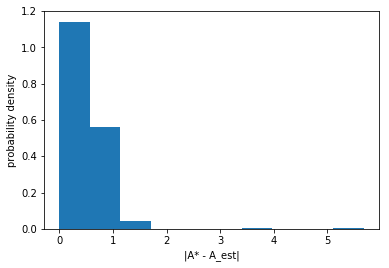

Доверительный интервал методом бутстреп: 99.76425711071064 < A < 101.23581522246306
Dl = 1.4715581117524152


In [69]:
plt.hist(arr_estimates, density = True)
plt.xlabel('|A* - A_est|')
plt.ylabel('probability density')
plt.show()
#необходим крайний элемент, который находится на месте = 0.95 * K
print('Доверительный интервал методом бутстреп: {} < A < {}'.format(A_est - arr_estimates[int(K * B)], 
                                                                    A_est + arr_estimates[int(K * B)]))
print('Dl = {}'.format(2 * arr_estimates[int(K * B)]))